# Email Classification using SVM

In [1]:
import numpy as np # linear algebra
import pandas as pd
df = pd.read_csv('spambase_csv.csv')

df.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Count of each class of the data,

Where 
1 = Spam
0 = Not a spam

In [2]:
df['class'].value_counts()

class
0    2788
1    1813
Name: count, dtype: int64

Hence we 1813 spam emails , 2788 non-spam

 A heatmap is created using seaborn's heatmap function, visualizing missing values (NaNs) in the DataFrame df. The DataFrame df.isna() generates a DataFrame of the same shape as df, where each element is True if the corresponding element in df is NaN and False otherwise. The seaborn heatmap function then visualizes this DataFrame as a heatmap, where missing values are represented by a different color (usually a shade of blue) compared to non-missing values.

<Axes: >

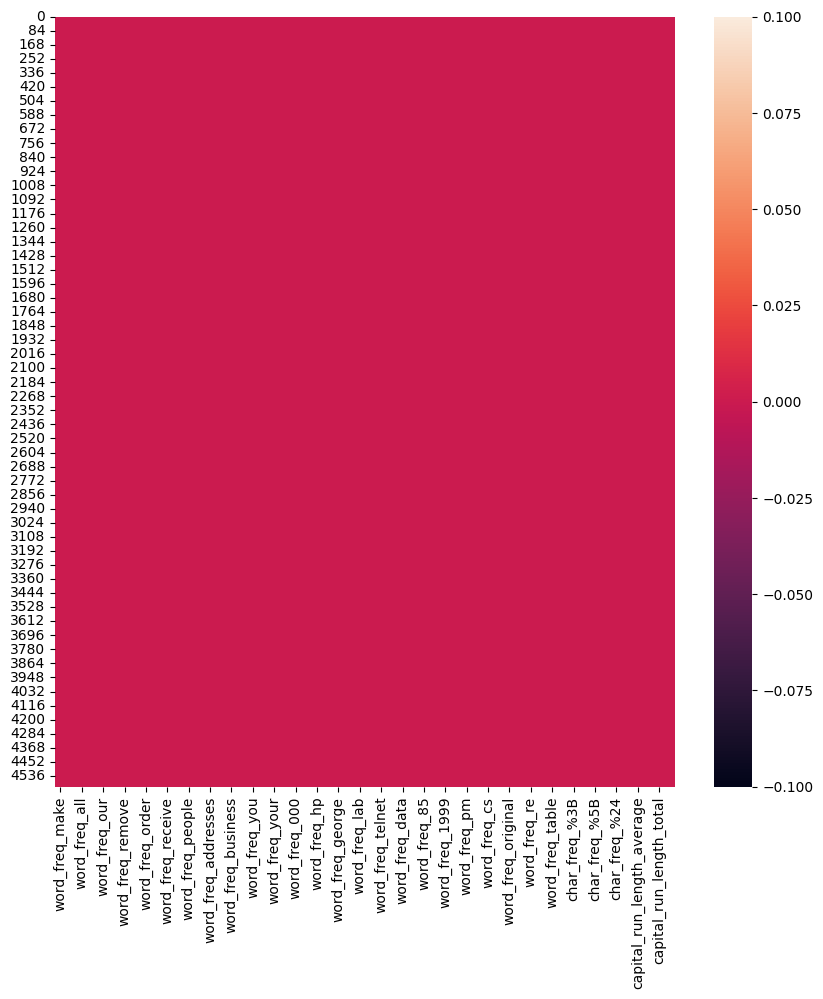

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[10,10]
sns.heatmap(df.isna())



This updated code computes the percentage of missing values in each column by first determining the proportion of NaN values in each column using df.isna().mean() * 100. This result is then plotted as a bar chart, where each bar represents the percentage of missing values for a specific column.

In [4]:
X = df.iloc[:,:57]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Train the Support Vector Machine model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Calculate accuracy
accuracy_svm = svm_model.score(X_test, y_test)
print("Accuracy:", accuracy_svm)



Accuracy: 0.9229098805646037


In [5]:

# Predict on the test set
preds_svm = svm_model.predict(X_test)

In [6]:
# Confusion matrix
cm_svm = confusion_matrix(preds_svm, y_test)
print("Confusion Matrix:")
print(cm_svm)


Confusion Matrix:
[[506  46]
 [ 25 344]]


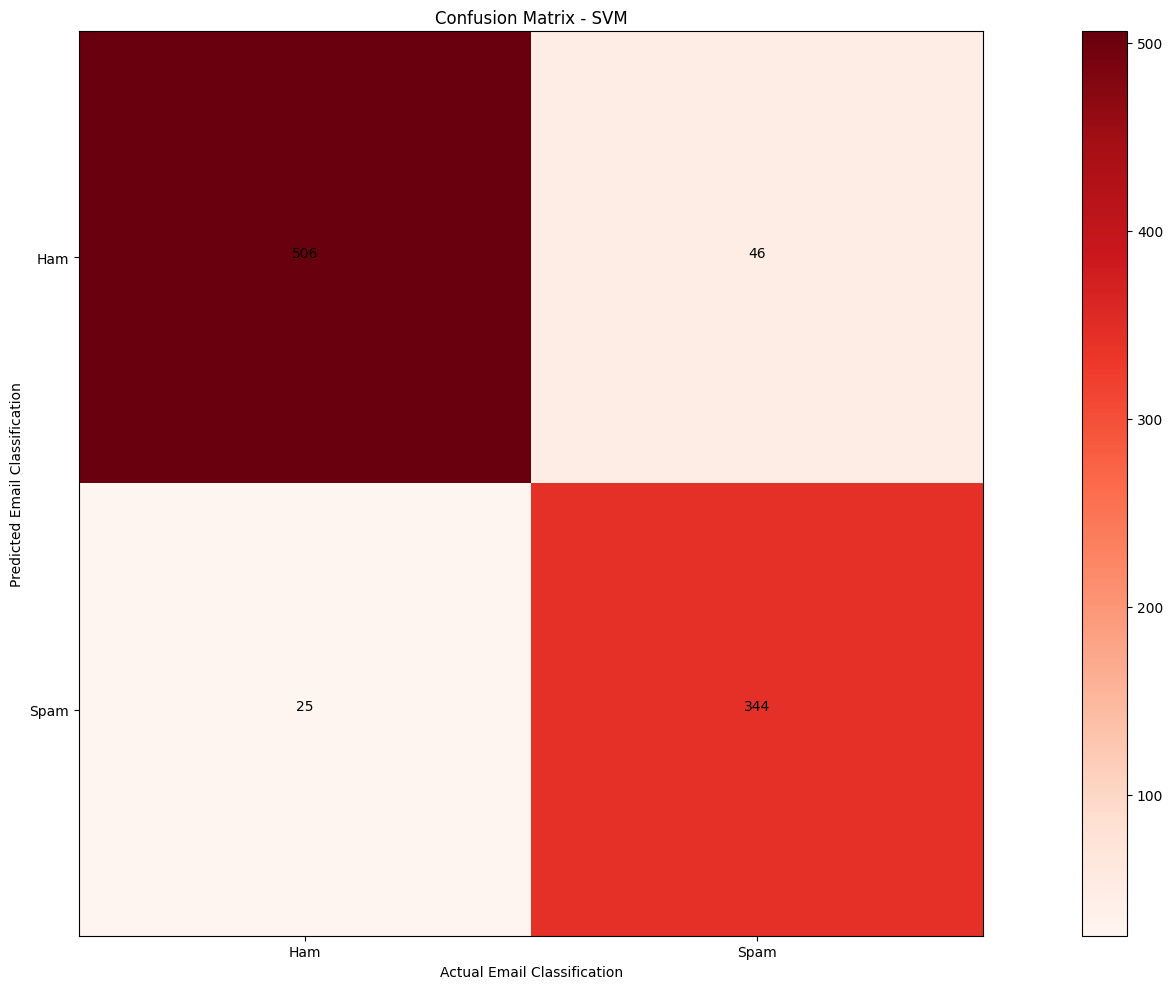

In [7]:

# Visualize confusion matrix
plt.figure(figsize=(20,10))
plt.imshow(cm_svm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix - SVM')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Ham', 'Spam'], rotation=0)
plt.yticks(tick_marks, ['Ham', 'Spam'])
plt.xlabel('Actual Email Classification')
plt.ylabel('Predicted Email Classification')
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm_svm[i, j], 'd'),
                 horizontalalignment="center",
                 color="black" if cm_svm[i, j] > cm_svm.max() / 2. else "black")
plt.tight_layout()
plt.show()



## Methodology:
**Import necessary libraries:** 
Import SVC from sklearn.svm, confusion_matrix from sklearn.metrics, and matplotlib.pyplot as plt.

**Train the Support Vector Machine (SVM) model:** 
Initialize an SVM model with a linear kernel (kernel='linear') and fit it to the training data (X_train and y_train).

**Calculate accuracy:**
Use the score method of the SVM model to calculate the accuracy on the test set (X_test and y_test).

**Make predictions:**
Use the trained SVM model to predict the labels for the test set (X_test).

**Compute the confusion matrix:**
Use the confusion_matrix function to compute the confusion matrix based on the predicted labels (preds_svm) and the actual labels (y_test).

**Print the confusion matrix:**
Print the confusion matrix to examine the performance of the SVM model.

**Visualize the confusion matrix:**
Use matplotlib.pyplot to visualize the confusion matrix with a heatmap, where each cell's color intensity represents the number of predictions made by the model.


## Inference: 
- The code snippet trains a Support Vector Machine (SVM) model with a linear kernel for a classification task (presumably spam classification given the class labels 'Ham' and 'Spam'). 
- After training the model, it calculates the accuracy on the test set and prints it out. 
- Then, it predicts the labels for the test set and computes the confusion matrix to evaluate the model's performance. 
- Finally, it visualizes the confusion matrix using a heatmap, providing a visual representation of how well the model is performing in terms of correctly classifying instances as 'Ham' or 'Spam'. 
- The diagonal elements of the confusion matrix represent the correct classifications, while off-diagonal elements represent misclassifications. 
- The intensity of colors in the heatmap indicates the number of instances classified into each category. 
- The visualization helps in quickly identifying any patterns of misclassification and assessing the overall performance of the SVM model.


# Digit Recognition using SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Download the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)



C:\Users\Ananya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Extract features (X) and labels (y)
X, y = mnist.data, mnist.target

# Step 2: Preprocess the dataset
# Normalize the features
X = X / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Support Vector Machine (SVM) model
# Initialize the SVM classifier
svm_clf = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)

# Train the SVM model
svm_clf.fit(X_train, y_train)

# Evaluate the trained model
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9764285714285714


In [3]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.96      0.97      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



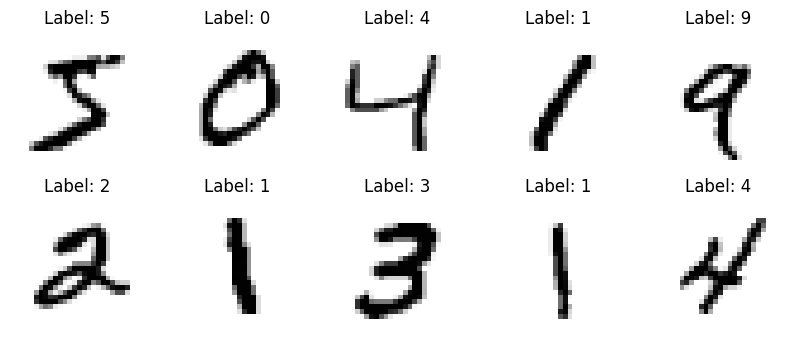

In [4]:

# Convert X to a numpy array
X = np.array(X)

# Visualize some sample images from the dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='binary', interpolation='nearest')  # Add 'interpolation' parameter
    plt.title('Label: ' + str(y[i]))
    plt.axis('off')
plt.show()


## Methodology:

1. **Downloading Dataset:** The code fetches the MNIST dataset using the `fetch_openml` function from `sklearn.datasets`. MNIST is a widely used dataset consisting of handwritten digits.

2. **Preprocessing:**
    - The features (images) are extracted as `X` and labels (corresponding digits) as `y`.
    - The pixel values of the images are normalized to a range of 0 to 1 by dividing by 255.0.

3. **Splitting Dataset:** The dataset is split into training and testing sets using `train_test_split` from `sklearn.model_selection`. The testing set size is 20% of the total dataset.

4. **Training SVM Model:**
    - An SVM classifier (`SVC`) with a radial basis function (RBF) kernel is initialized with certain hyperparameters (`kernel='rbf'`, `gamma='scale'`, `C=1.0`). 
    - The model is trained on the training data using the `fit` method.

5. **Model Evaluation:**
    - The trained model is evaluated on the testing set by making predictions using `predict` method.
    - Accuracy of the model is computed using `accuracy_score` from `sklearn.metrics`.
    - Classification report, including precision, recall, and F1-score, is printed using `classification_report`.

6. **Visualization:**
    - The first 10 samples from the dataset are visualized using matplotlib. Each sample is reshaped to a 28x28 image and displayed with its corresponding label.



## Inference:

1. **Accuracy:** The accuracy of the SVM model on the test set is printed (0.97). It gives an overall measure of how well the model performs.

2. **Classification Report:** The classification report provides a detailed breakdown of model performance for each class. It includes precision, recall, F1-score, and support (number of occurrences of each class in the test set).

3. **Visualization:** The visualization allows us to qualitatively inspect the dataset by displaying some sample images along with their labels. This gives an intuitive understanding of the data the model is trained on.

